<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Time Series
</h2>
</div>    
</center>

<a id = 'toc'></a>
# Table of Contents

- ### [Calculus](#calculus)
- ### [Exploratory Data Analysis](#eda)
- ### [Model](#model)

<a id = 'calculus'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Calculus
</h2>
</div>    
</center>

<div style="display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;">AR (AutoRegressive)
</h2>
</div>

To make a forecast based on our time series we will use the AutoRegressive model. Based on the past values in the series - called lags, AR relies on the time series to being stationary. \
An AR model, that depends on a lag in the past - called an **AR model of order one** or AR(1).

$$Y_{t} = \omega + \phi_{1}Y_{t-1} + \varepsilon_{t}$$

- $Y_{t}$ - Target, $Y_{t-1}$ - Lagged Target, $\varepsilon_{t}$ - Error
- $\omega$ - intercept, $\phi$ - constant(coefficient)

This recursion (lagged target going back to the previous data point) in time goes back until the beginning of the series, so these are called **Long Memory Models**.

$$\begin{aligned}
Y_{t} &= \omega + \phi Y_{t-1} + \varepsilon_{t} \\
Y_{t-1} &= \omega + \phi Y_{t-2} + \varepsilon_{t-1} \\
\downarrow \\
Y_{t} &= \omega^{*} + \phi^{2} Y_{t-2} + \phi \varepsilon_{t-1} + \varepsilon_{t}  \\
\\
Y_{t-2} &= \omega + \phi Y_{t-3} + \varepsilon_{t-2} \\
\downarrow \\
Y_{t} &= \omega^{*} + \phi^{3} Y_{t-3} + \phi^{2} \varepsilon_{t-2} + \phi \varepsilon_{t-1} + \varepsilon_{t} \\
\end{aligned}
$$

If we continued to insert the previous observations, we would arrive at the first observation, and with each step the effect of the previous values would decrease IF $|\phi| < 1$. \
This goes back to the idea of stationary - the dependence of previous observations declines over time.

<div style="display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;">MA (Moving Average)
</h2>
</div>

Instead of looking at the previous lagged target value, we'll make use of the lagged error.\
An MA model, that depends on a lag error in the past - called an **MA model of order one** or MA(1).

$$Y_{t} = \omega + \theta_{1}\varepsilon_{t - 1} + \varepsilon_{t}$$

To avoid the first prediction leak (we don't have a prediction for the first observation), we use the average of the time series.\
MA models are **Short Memory Models** - these errors don't last long into the future.

$$\begin{aligned}
Y_{t - 1} &= \omega + \theta \varepsilon_{t-2} + \varepsilon_{t-1}\\
Y_{t} &= \omega + \theta \varepsilon_{t - 1} + \varepsilon_{t}\\
Y_{t + 1} &= \omega + \theta \varepsilon_{t} + \varepsilon_{t+1}\\
\end{aligned}
$$

This goes back to the idea of stationarity - the dependence of previous observations decline over time.
In **MA(1)** models, the effect of shocks has NO effect on the present if they happened long enough ago.

<div style="display:fill;
           border: 0px;
           border-bottom: 2px solid #AAA;
           font-size:80%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;">ARIMA
</h2>
</div>

**ARIMA** - AR + I + MA

$$Y_{t} = \omega + \phi_{1}Y_{t - 1} + ... + \phi_{p}Y_{t - p} + \theta_{t}\varepsilon_{t-1} + ... + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t}$$

- **I** - integrated. Essentially, you need to make your data stationary (by differencing the time series). Distribution depends only on difference in time, not location in time.

**Example with selected orders:**
ARIMA (1, 1, 1) (p, d, q)
- *d* → $Y_{t} - Y_{t - 1} = W_{t}$
- *p, q* → $W_{t} = \omega + \phi_{1}W_{t-1} + \theta_{1}\varepsilon_{t - 1} + \varepsilon_{t}$

**Deciding how many orders (p, q)**\
Couple of different **techniques to selecting models**:
1. Plotting patterns in correlation
2. Automatic selection techniques

[UP](#toc)

<a id = 'eda'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Exploratory Data Analysis
</h2>
</div>    
</center>

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from scipy.stats import ks_2samp

import statsmodels.api as sm

import warnings
warnings.filterwarnings(action = 'ignore')

## Data

In [114]:
df = pd.read_csv('assets/time_series/store_sales.csv')

# Get rid off unnecessary columns
df = df[df.columns[2:]]
df.head()

,date,store_nbr,item_nbr,unit_sales,onpromotion
0,2013-01-01,25,103665,7.0,NaN
1,2013-01-01,25,105574,1.0,NaN
2,2013-01-01,25,105575,2.0,NaN
3,2013-01-01,25,108079,1.0,NaN
4,2013-01-01,25,108701,1.0,NaN


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 8 columns):
 #   Column       Dtype         
---  ------       -----         
 0   date         datetime64[ns]
 1   store_nbr    int64         
 2   item_nbr     int64         
 3   unit_sales   float64       
 4   onpromotion  float64       
 5   year         int32         
 6   month        int32         
 7   day          int32         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(2)
memory usage: 248.0 MB


In [156]:
# Change date column type
df['date'] = pd.to_datetime(df['date'])

# Get date features
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Select the most saled item
max_item_sales = df['item_nbr'].value_counts().index[0]
df_item = df[df['item_nbr'] == max_item_sales]

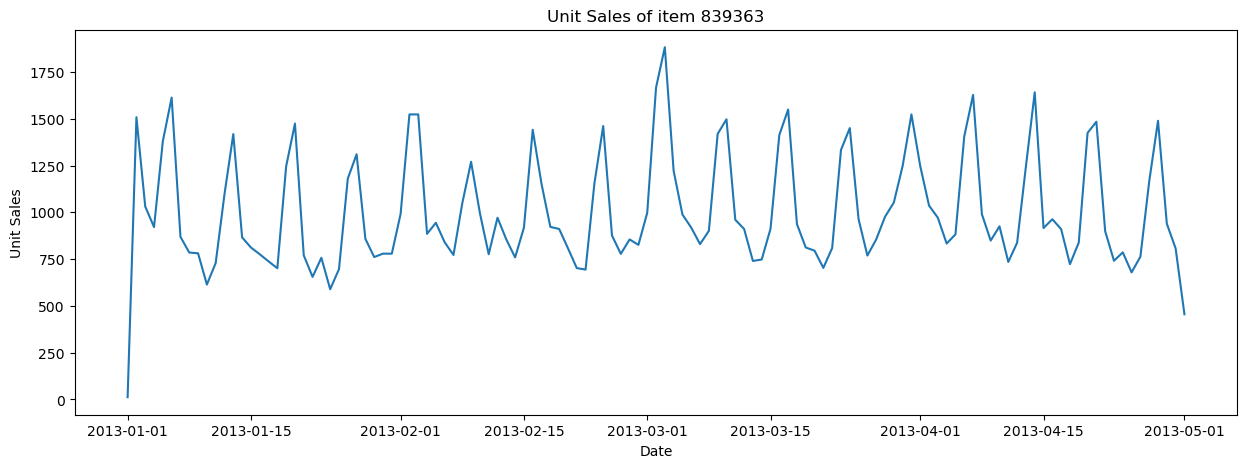

In [157]:
# Groupby date to create a time series dataframe
df_time = df_item.groupby(['date']).agg({'unit_sales':'sum'}).sort_index()

# Plot the time series
fig, ax = plt.subplots(1, 1, figsize = (15, 5))
sns.lineplot(df_time['unit_sales'])
ax.set_title(f'Unit Sales of item {max_item_sales}')
ax.set_xlabel('Date')
ax.set_ylabel('Unit Sales')
plt.show()

### Distribution

[DIST 1] - [DIST 2]: 0.449 , [MEAN]: 922.54 - 949.17, [STD]: 366.04 - 211.63
[DIST 2] - [DIST 3]: 0.686 , [MEAN]: 949.17 - 1050.88, [STD]: 211.63 - 270.58
[DIST 1] - [DIST 3]: 0.068 , [MEAN]: 922.54 - 1050.88, [STD]: 366.04 - 270.58


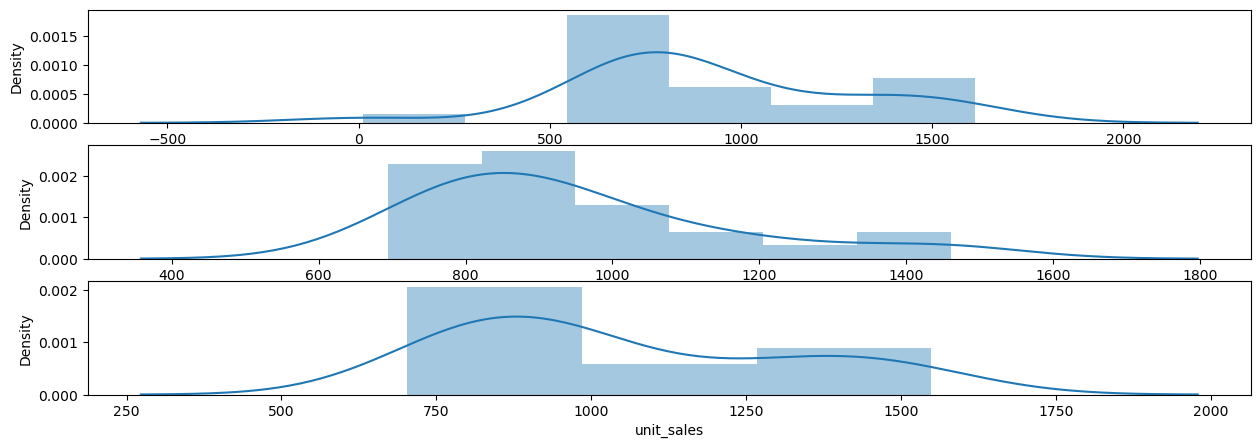

In [158]:
dist_split_1 = df_time.iloc[int(len(df_time)*.0):int(len(df_time)*.2)]['unit_sales']
dist_split_2 = df_time.iloc[int(len(df_time)*.3):int(len(df_time)*.5)]['unit_sales']
dist_split_3 = df_time.iloc[int(len(df_time)*.6):int(len(df_time)*.8)]['unit_sales']

print(f'[DIST 1] - [DIST 2]: {ks_2samp(dist_split_1, dist_split_2)[1]:.3f} \
, [MEAN]: {dist_split_1.mean():.2f} - {dist_split_2.mean():.2f}, [STD]: {dist_split_1.std():.2f} - {dist_split_2.std():.2f}')
print(f'[DIST 2] - [DIST 3]: {ks_2samp(dist_split_2, dist_split_3)[1]:.3f} \
, [MEAN]: {dist_split_2.mean():.2f} - {dist_split_3.mean():.2f}, [STD]: {dist_split_2.std():.2f} - {dist_split_3.std():.2f}')
print(f'[DIST 1] - [DIST 3]: {ks_2samp(dist_split_1, dist_split_3)[1]:.3f} \
, [MEAN]: {dist_split_1.mean():.2f} - {dist_split_3.mean():.2f}, [STD]: {dist_split_1.std():.2f} - {dist_split_3.std():.2f}')

fig, ax = plt.subplots(3, 1, figsize = (15,5))
sns.distplot(dist_split_1, ax = ax[0])
sns.distplot(dist_split_2, ax = ax[1])
sns.distplot(dist_split_3, ax = ax[2])
plt.show()

### Stationary

In [159]:
adfuller_test = adfuller(df_time['unit_sales'])
print(f'1. ADF - Critical Value: {adfuller_test[0]:.2f}')
print(f'2. P-Value: Reject HA (NOT reject H0): {adfuller_test[1]:.4f}')
print(f'3. Lags used for regression: {adfuller_test[2]}')
print(f'4. Observations used in the analysis: {adfuller_test[3]}')
print(f'5. T-values corresponding to Adfuller Test:')
for key, val in adfuller_test[4].items():
    print(f'\t ► {key} : {val:.2f}')
    
if adfuller_test[1] <= .05:
    print(f'→ The TIME SERIES is stationary')
else:
    print(f'→ The TIME SERIES is NOT stationary')

1. ADF - Critical Value: -1.74
2. P-Value: Reject HA (NOT reject H0): 0.4108
3. Lags used for regression: 13
4. Observations used in the analysis: 107
5. T-values corresponding to Adfuller Test:
	 ► 1% : -3.49
	 ► 5% : -2.89
	 ► 10% : -2.58
→ The TIME SERIES is NOT stationary


In [160]:
# Differencing time series
df_time['diff'] = df_time['unit_sales'].diff()
mean_sales = abs(df_time['diff']).mean()
df_time['diff'] = df_time['diff'].fillna(mean_sales)

adfuller_test = adfuller(df_time['diff'])
print(f'1. ADF - Critical Value: {adfuller_test[0]:.2f}')
print(f'2. P-Value: Reject HA (NOT reject H0): {adfuller_test[1]:.4f}')
print(f'3. Lags used for regression: {adfuller_test[2]}')
print(f'4. Observations used in the analysis: {adfuller_test[3]}')
print(f'5. T-values corresponding to Adfuller Test:')
for key, val in adfuller_test[4].items():
    print(f'\t ► {key} : {val:.2f}')
    
if adfuller_test[1] <= .05:
    print(f'→ The TIME SERIES is stationary')
else:
    print(f'→ The TIME SERIES is NOT stationary')

1. ADF - Critical Value: -5.18
2. P-Value: Reject HA (NOT reject H0): 0.0000
3. Lags used for regression: 12
4. Observations used in the analysis: 108
5. T-values corresponding to Adfuller Test:
	 ► 1% : -3.49
	 ► 5% : -2.89
	 ► 10% : -2.58
→ The TIME SERIES is stationary


In [161]:
# Using differencing method
#df_time['unit_sales'].diff()

# Using inverse-differencing time series
#np.array(np.r_[df_time['diff_pd'][0], df_time['diff_pd'][1:]].cumsum())

### Stationary

In [ ]:
forecast = []

for time in range(len(series) - window_size):
    forecast.append(series[time:time + window_size].mean())
return np.array(forecast)


### Distribution

[UP](#toc)

<a id = 'model'></a>
<center>
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#212121;
           font-size:110%;
           letter-spacing:0.5px">
<h2 style="padding: 10px;
           color:#FFFFFF;">Model
</h2>
</div>    
</center>

[UP](#toc)